In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin-1')

In [4]:
df.sample(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
77335,200501010003,2005,1,1,NaN,0,NaN,45,Colombia,3,...,"The mayor of Tame, Alfredo Guzman Tafur, said ...","""FARC Rebels Kill Seventeen People in Tame, Ar...",NaN,NaN,CETIS,0,0,0,0,NaN
46384,199105090010,1991,5,9,NaN,0,NaN,159,Peru,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
121425,201309200004,2013,9,20,NaN,0,NaN,60,Egypt,10,...,NaN,"""Three explosions went off in North Sinai,"" Wo...","""Report: Egyptian soldiers injured in Sinai ex...","""Explosion near army buses on Arish-Rafah Rd, ...",START Primary Collection,-9,-9,0,-9,NaN
48791,199110260029,1991,10,26,NaN,0,NaN,61,El Salvador,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,"199110260029, 199110260002, 199110260003, 1991..."
170942,201701060004,2017,1,6,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Highlights: Pakistan Balochistan Press 7 Janu...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
46421,199105110012,1991,5,11,NaN,0,NaN,159,Peru,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
36809,198901080001,1989,1,8,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
115205,201303160023,2013,3,16,NaN,0,NaN,147,Nigeria,11,...,NaN,"""Gunmen kill justice official in Nigeria's nor...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
158174,201601270024,2016,1,27,2016-01-27 00:00:00,0,NaN,4,Afghanistan,6,...,NaN,"""Gunmen kill local police commander,"" Frontier...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
44785,199012050008,1990,12,5,NaN,0,NaN,11,Argentina,3,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,"199012050008, 199012050009"


In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]

df.sample(10)

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
49538,1991,12,22,Chile,South America,Santiago,-33.366238,-70.505302,Bombing/Explosion,0.0,0.0,0.0,Store in Providenecia District,United Popular Action Movement,Business,Explosives
87652,2008,6,30,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Assassination,0.0,1.0,1.0,"Ali Al Alaq, an appeals court judge,",Unknown,Government (General),Explosives
61121,1995,12,13,Burundi,Sub-Saharan Africa,Gitega,-3.427512,29.924253,Bombing/Explosion,0.0,0.0,0.0,Residence,Unknown,NGO,Explosives
180764,2017,11,25,Nepal,South Asia,Sarlahi,26.964309,85.555528,Assassination,0.0,0.0,0.0,Residence of Livestock Development minister,Unknown,Government (General),Explosives
87823,2008,7,9,Philippines,Southeast Asia,Maligaya,7.079003,124.886312,Armed Assault,0.0,0.0,0.0,Rice farmers,Moro Islamic Liberation Front (MILF),Private Citizens & Property,Firearms
176170,2017,6,20,Yemen,Middle East & North Africa,Shaykh Uthman,12.867085,44.981911,Armed Assault,0.0,3.0,3.0,Checkpoint,Unknown,Military,Firearms
93442,2009,9,1,Afghanistan,South Asia,Kala Zal,36.996632,68.434822,Unknown,2.0,0.0,2.0,A government building was targeted in the attack.,Taliban,Government (General),Unknown
37586,1989,3,14,India,South Asia,Bongaigaon,26.480000,90.560000,Bombing/Explosion,0.0,0.0,0.0,Oil Refinery,Bodo Militants,Business,Explosives
79804,2006,2,12,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Armed Assault,2.0,0.0,2.0,Civilians in the Shula neighborhood of Baghdad...,Unknown,Private Citizens & Property,Firearms
62131,1996,4,12,United States,North America,Vacaville,38.351355,-121.993429,Bombing/Explosion,0.0,2.0,2.0,Truck of a mine inspector working for the Unit...,Anti-Government Group,Government (General),Explosives


In [8]:
df.shape

(181691, 16)

In [9]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             435
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           638
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [10]:
df.describe(include='all')

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
count,181691.000000,181691.000000,181691.000000,181691,181691,181256,177135.000000,1.771340e+05,181691,171378.000000,165380.000000,164817.000000,181053,181691,181691,181691
unique,NaN,NaN,NaN,205,12,36673,NaN,NaN,9,NaN,NaN,NaN,86005,3537,22,12
top,NaN,NaN,NaN,Iraq,Middle East & North Africa,Unknown,NaN,NaN,Bombing/Explosion,NaN,NaN,NaN,Civilians,Unknown,Private Citizens & Property,Explosives
freq,NaN,NaN,NaN,24636,50474,9775,NaN,NaN,88255,NaN,NaN,NaN,6461,82782,43511,92426
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,2.403272,3.167668,5.296128,NaN,NaN,NaN,NaN
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,11.545741,35.949392,42.069023,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,2.000000,2.000000,4.000000,NaN,NaN,NaN,NaN


In [11]:
df.duplicated().sum()

10675

In [12]:
print(f"""There are {df.Country.nunique()} unique countries where these attacks happens!!.""")

There are 205 unique countries where these attacks happens!!.


In [13]:
print(f"""These attacks happen between {df.Year.min()} and {df.Year.max()}.""")

These attacks happen between 1970 and 2017.


In [14]:
print(f""" There are today casulities {df.Casualities.sum()} of which {df.Killed.sum()} are killed and {df.Wounded.sum()} are wounded.""")

 There are today casulities 872892.0 of which 411868.0 are killed and 523869.0 are wounded.


In [15]:
df.AttackType.nunique()

9

In [16]:
df['Year'].value_counts(dropna = False).sort_index()

Year
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: count, dtype: int64

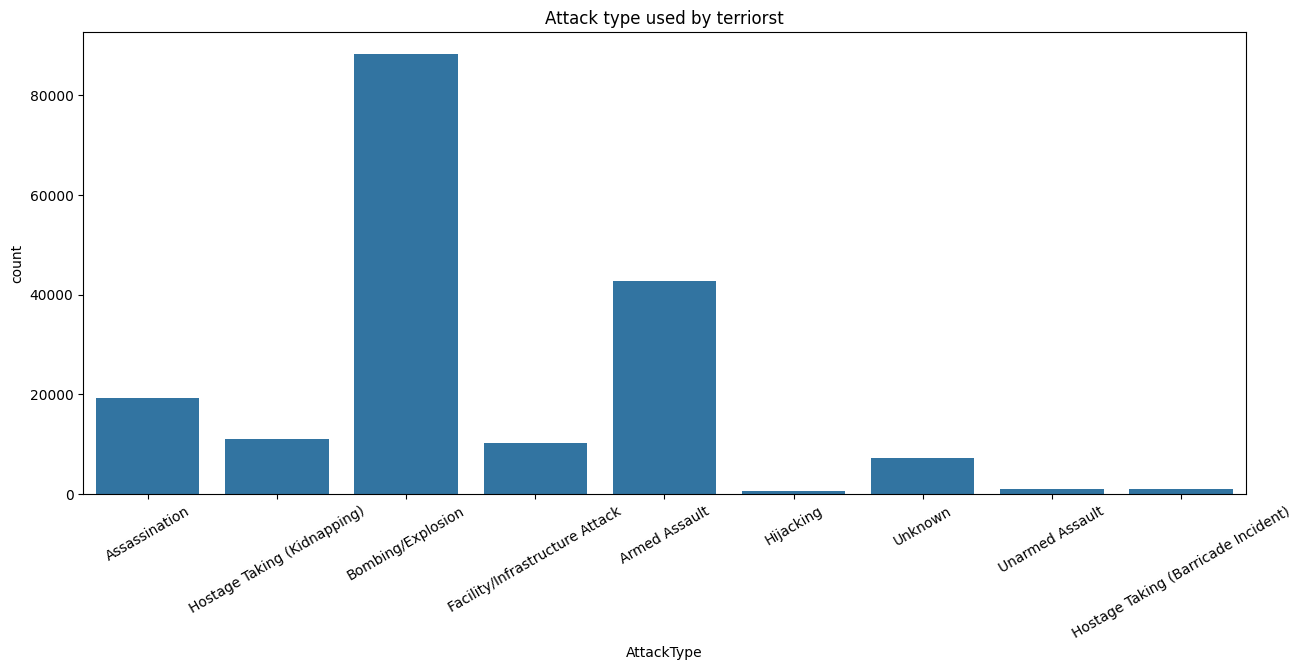

In [17]:
plt.figure(figsize=(15, 6))
sns.countplot(x='AttackType',data=df)
plt.xticks(rotation=30)
plt.title('Attack type used by terriorst')
plt.show()

In [18]:
df.Target_type.nunique()

22

In [19]:
df.Weapon_type.nunique()

12

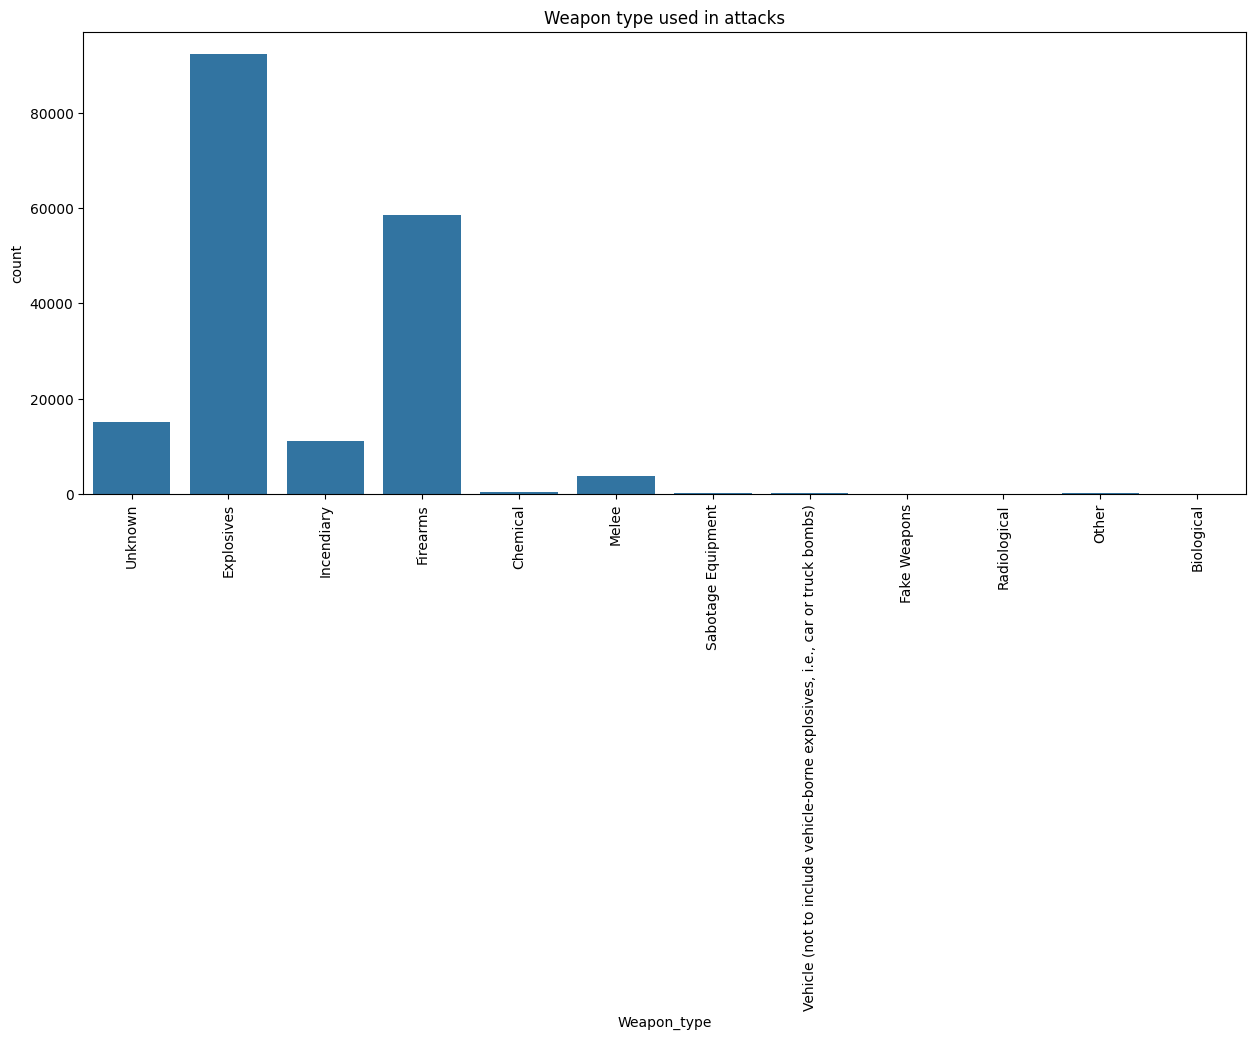

In [20]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Weapon_type',data=df)
plt.title('Weapon type used in attacks')
plt.xticks(rotation=90)
plt.show()

In [21]:
df.Group.nunique()

3537

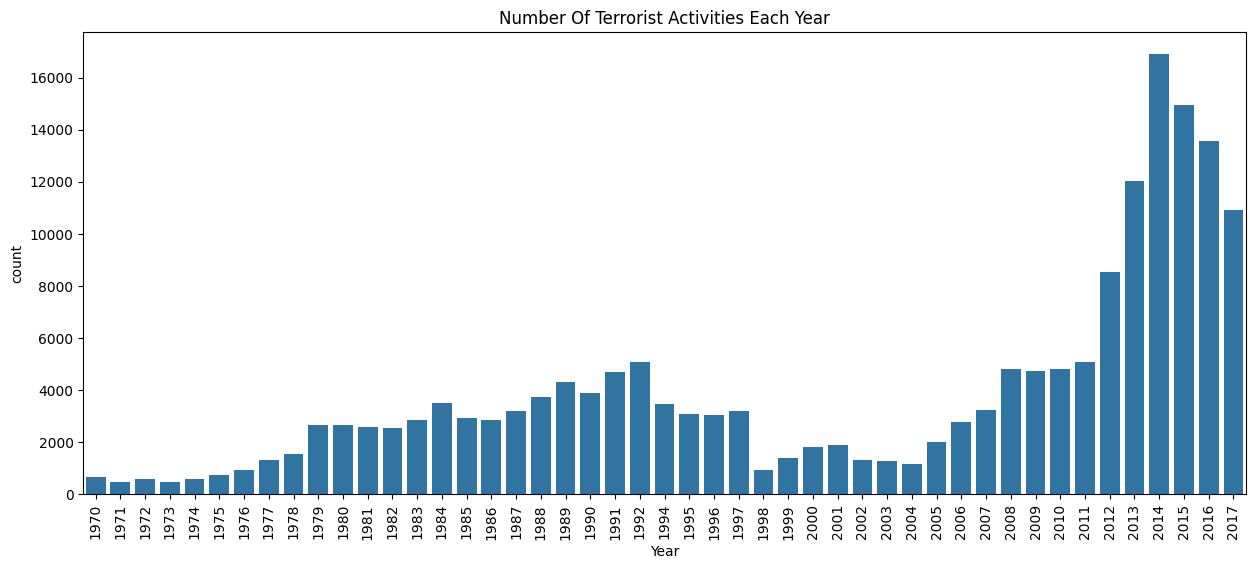

In [22]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year',data=df)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

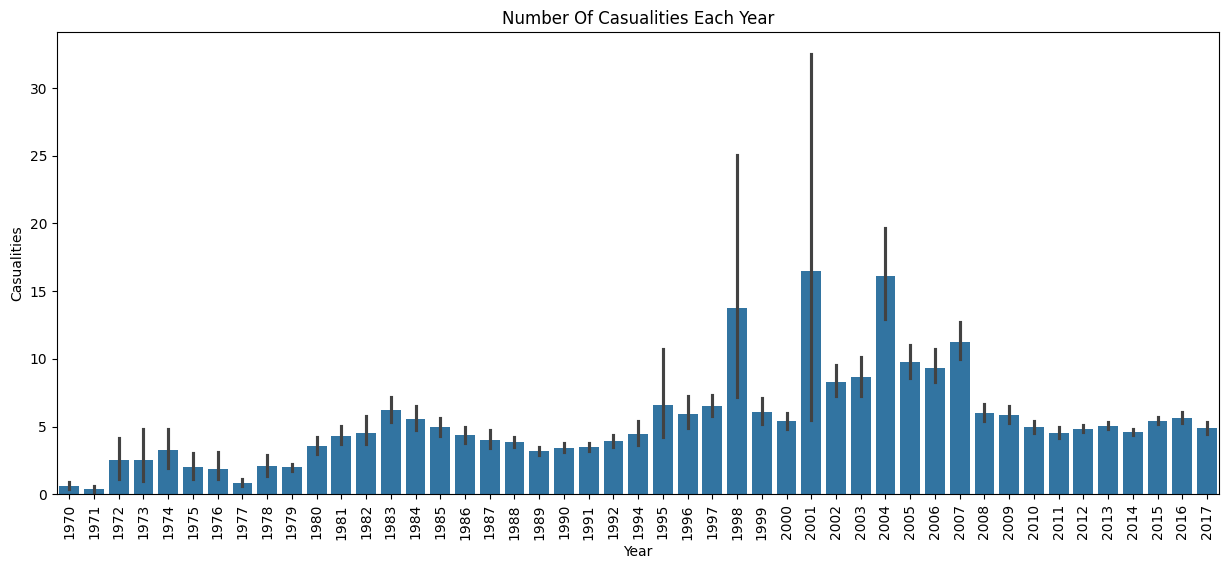

In [23]:
plt.subplots(figsize=(15,6))
sns.barplot(x='Year', y='Casualities',data=df)
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()

In [24]:
df.dtypes

Year             int64
Month            int64
Day              int64
Country         object
Region          object
City            object
latitude       float64
longitude      float64
AttackType      object
Killed         float64
Wounded        float64
Casualities    float64
Target          object
Group           object
Target_type     object
Weapon_type     object
dtype: object

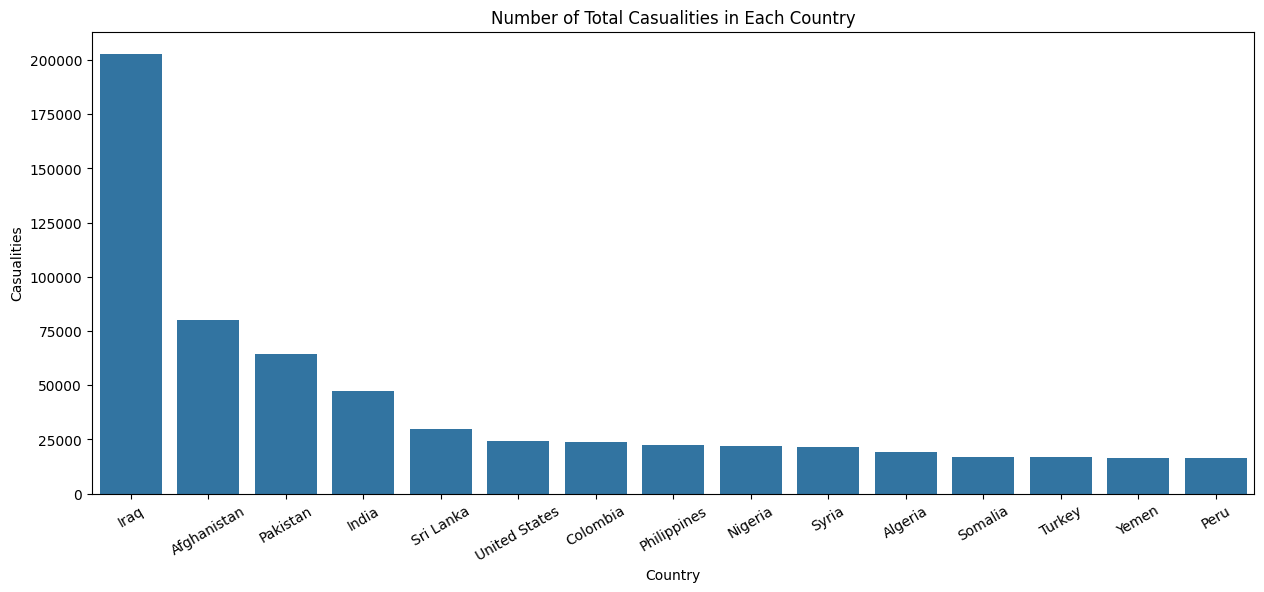

In [25]:
plt.subplots(figsize=(15,6))
count_cas = df.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
sns.barplot(x=count_cas.Country, y=count_cas.Casualities)
plt.xticks(rotation=30)
plt.title('Number of Total Casualities in Each Country')
plt.show()

In [26]:
df.Region.nunique()

12

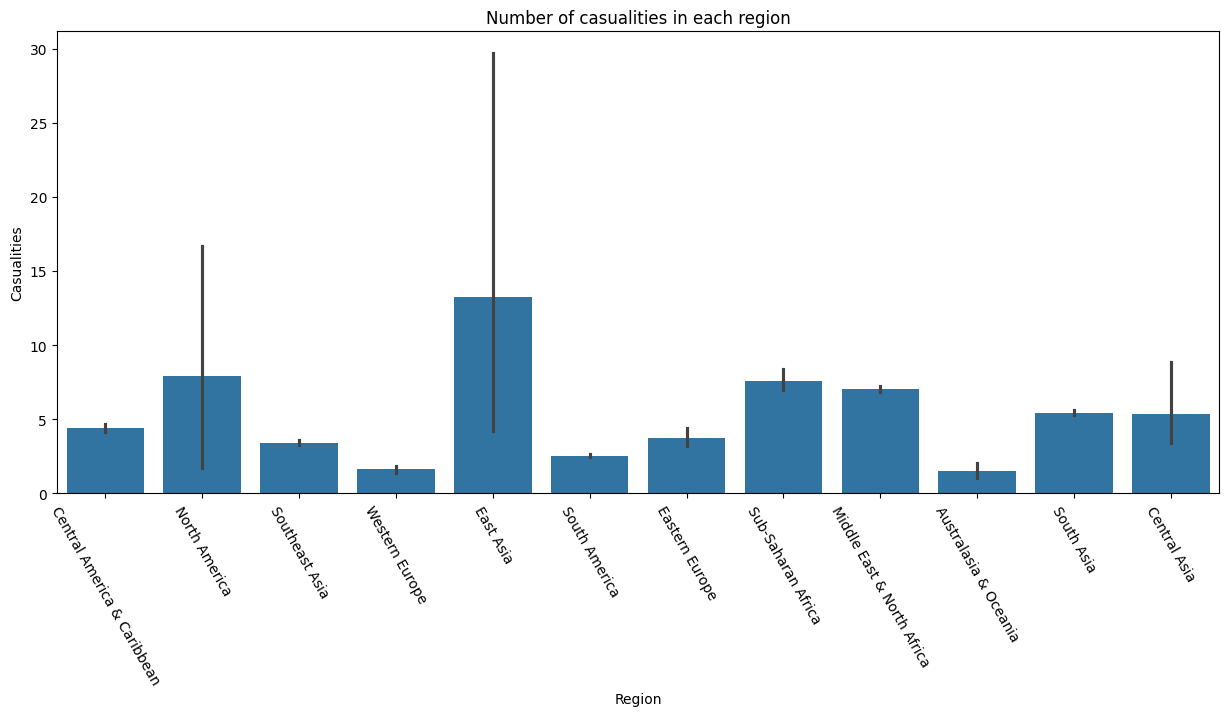

In [27]:
plt.subplots(figsize=(15,6))
sns.barplot(x='Region', y='Casualities',data=df)
plt.xticks(rotation=300)
plt.title('Number of casualities in each region')
plt.show()


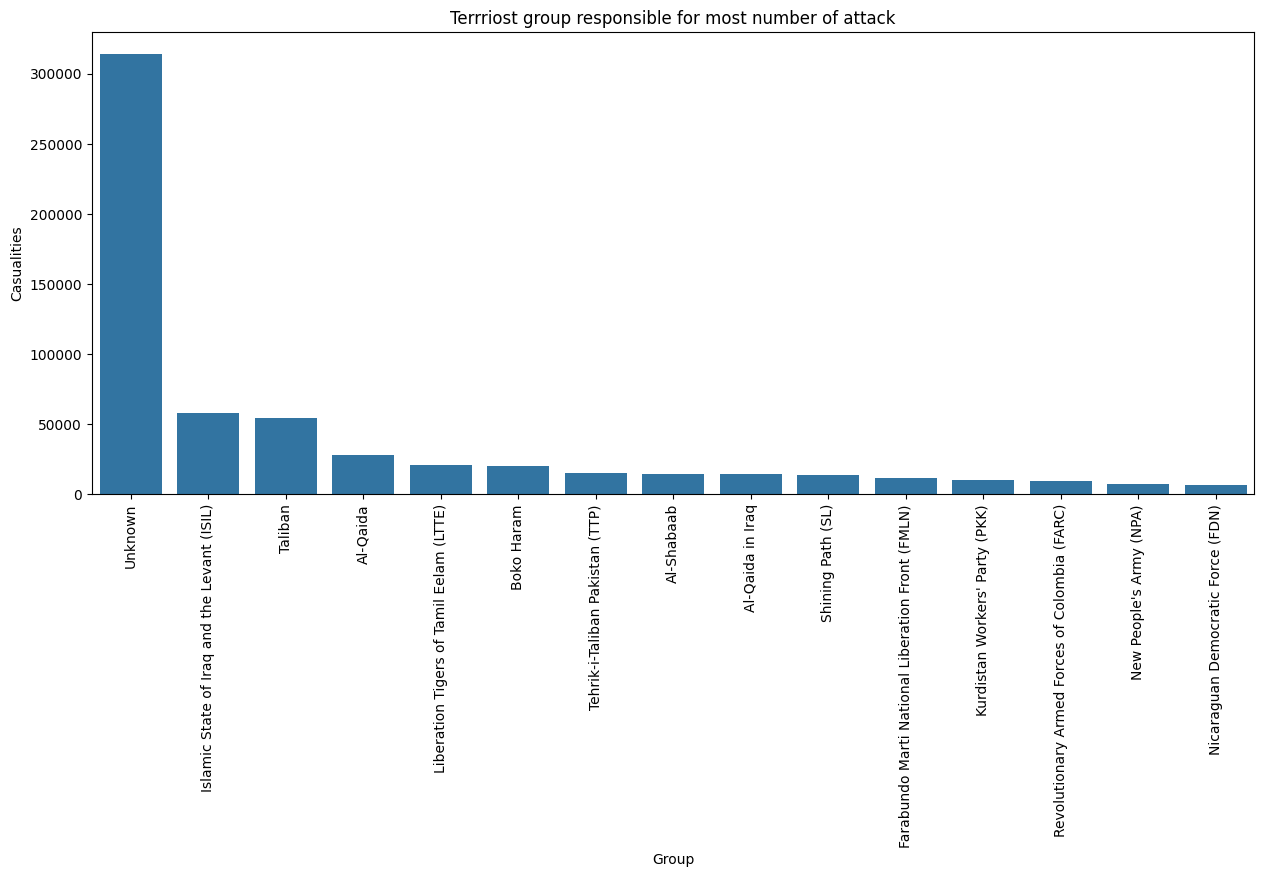

In [28]:
plt.subplots(figsize=(15,6))
count_cas = df.groupby('Group').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:15]
sns.barplot(x=count_cas.Group, y=count_cas.Casualities)
plt.xticks(rotation=90)
plt.title('Terrriost group responsible for most number of attack')
plt.show()

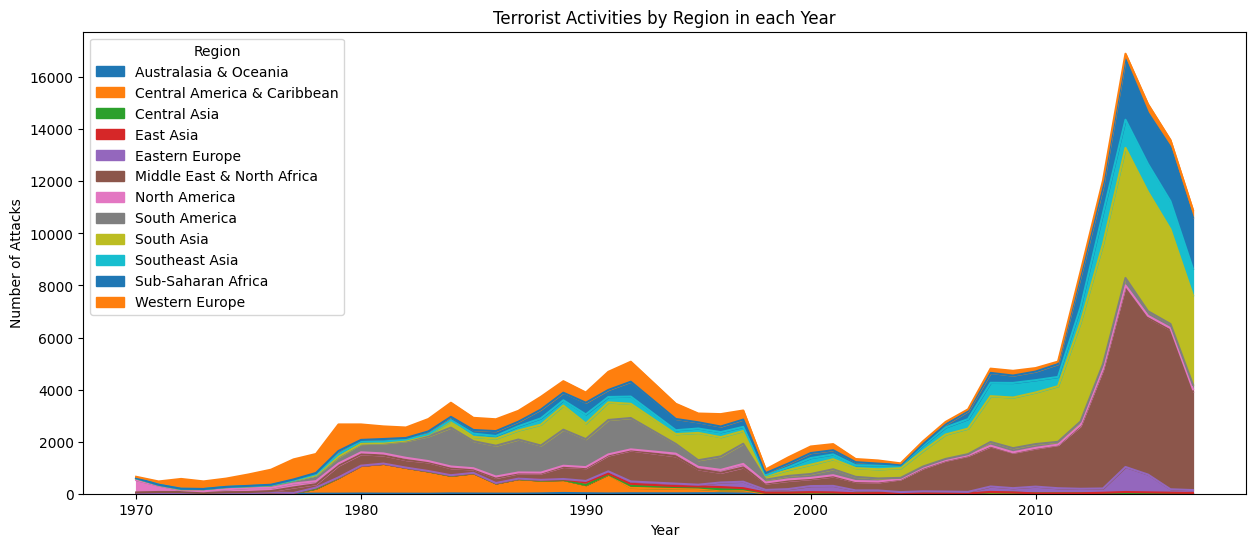

In [29]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

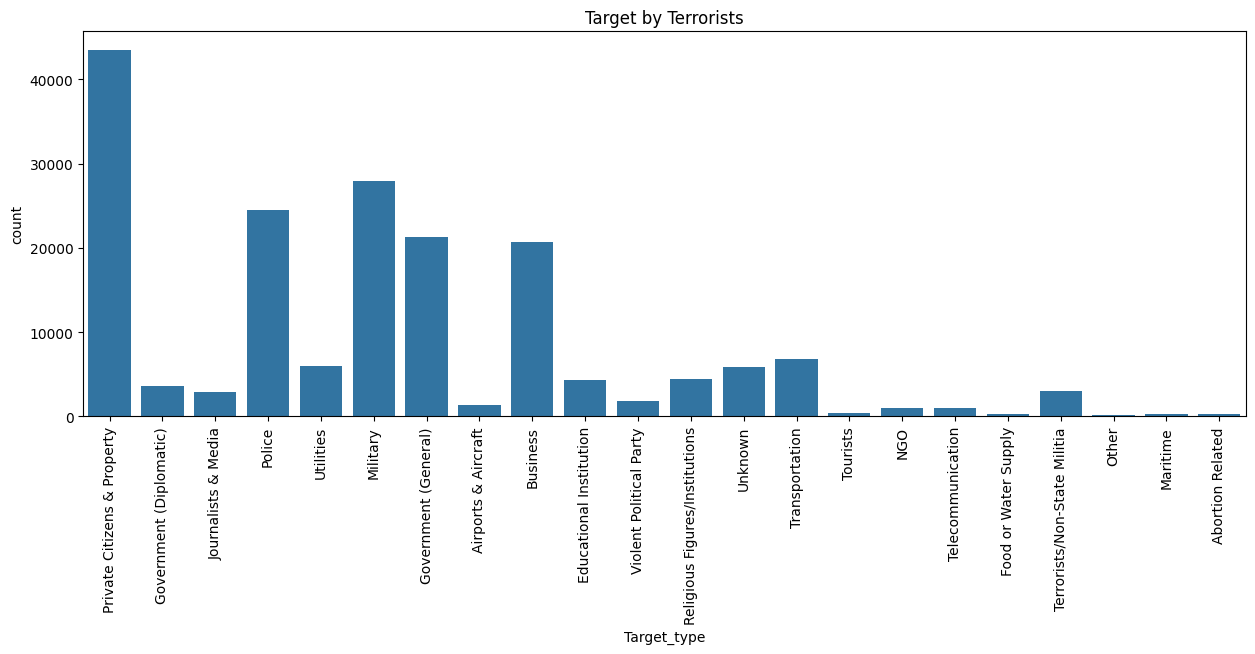

In [32]:
plt.subplots(figsize=(15,5))
sns.countplot(x='Target_type',data=df)
plt.xticks(rotation=90)
plt.title('Target by Terrorists')
plt.show()